In [1]:
import sys
import sklearn
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('train_data.csv')
df

,ID,axonal_coor_x,axonal_coor_y,axonal_coor_z,dendritic_coor_x,dendritic_coor_y,dendritic_coor_z,adp_dist,post_skeletal_distance_to_soma,pre_skeletal_distance_to_soma,...,post_brain_area,pre_nucleus_x,pre_nucleus_y,pre_nucleus_z,post_nucleus_x,post_nucleus_y,post_nucleus_z,pre_nucleus_id,post_nucleus_id,connected
0,42593,1187660,411978,1089020,1187390,412220,1089160,304.185,353043.0,1182170.0,...,RL,1283392,621504,1020280,1196352,492736,919560,557121,518848,False
1,42594,1204580,682542,873138,1204640,682870,873890,725.431,244156.0,914243.0,...,RL,1283392,621504,1020280,1196352,492736,919560,557121,518848,False
2,42595,1191790,403683,1093180,1188590,402414,1092660,3423.030,363829.0,1171820.0,...,RL,1283392,621504,1020280,1196352,492736,919560,557121,518848,False
3,42596,1184320,419286,1082930,1186620,419721,1085540,3442.390,344267.0,1192340.0,...,RL,1283392,621504,1020280,1196352,492736,919560,557121,518848,False
4,42597,1189150,673302,944202,1188790,677771,942901,4442.380,313630.0,788566.0,...,RL,1283392,621504,1020280,1196352,492736,919560,557121,518848,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185827,228420,1260230,553602,913395,1262580,551457,912880,3162.000,86928.2,936997.0,...,RL,1267840,625088,983200,1261568,461952,910680,557030,553624,False
185828,228421,1214580,405321,916671,1212910,402240,915289,3503.660,114862.0,1136290.0,...,RL,1267840,625088,983200,1261568,461952,910680,557030,553624,False
185829,228422,1223920,375081,840987,1221050,372827,843288,3939.260,140923.0,1173670.0,...,RL,1267840,625088,983200,1261568,461952,910680,557030,553624,False
185830,228423,1253490,387870,853797,1257280,390086,854335,4192.360,110553.0,1126160.0,...,RL,1267840,625088,983200,1261568,461952,910680,557030,553624,False


In [3]:
df.dtypes

ID                                  int64
axonal_coor_x                       int64
axonal_coor_y                       int64
axonal_coor_z                       int64
dendritic_coor_x                    int64
dendritic_coor_y                    int64
dendritic_coor_z                    int64
adp_dist                          float64
post_skeletal_distance_to_soma    float64
pre_skeletal_distance_to_soma     float64
pre_oracle                        float64
pre_test_score                    float64
pre_rf_x                          float64
pre_rf_y                          float64
post_oracle                       float64
post_test_score                   float64
post_rf_x                         float64
post_rf_y                         float64
compartment                        object
pre_brain_area                     object
post_brain_area                    object
pre_nucleus_x                       int64
pre_nucleus_y                       int64
pre_nucleus_z                     

In [4]:
feature_weights = pd.read_csv('feature_weights.csv')
feature_weights

,nucleus_id,feature_weight_0,feature_weight_1,feature_weight_2,feature_weight_3,feature_weight_4,feature_weight_5,feature_weight_6,feature_weight_7,feature_weight_8,...,feature_weight_502,feature_weight_503,feature_weight_504,feature_weight_505,feature_weight_506,feature_weight_507,feature_weight_508,feature_weight_509,feature_weight_510,feature_weight_511
0,557058,0.205733,0.317099,-0.241713,0.014264,-0.314002,-0.432338,0.152562,0.186511,0.140944,...,-0.034500,0.363631,0.183755,0.231815,0.042877,0.402666,0.016072,0.072968,-0.452475,-0.175632
1,155650,0.166665,-0.293123,-0.017896,-0.159223,0.246045,-0.138767,0.217365,-0.174787,-0.050760,...,0.276523,0.333738,0.277954,-0.124248,0.228173,0.029465,0.198626,-0.044919,0.661572,0.110016
2,425987,0.453440,0.174334,0.279131,0.144052,0.218536,0.110859,-0.090576,0.125406,0.110690,...,0.300525,-0.160008,0.052873,0.112233,-0.091779,-0.046790,0.280856,0.399340,0.305763,0.218547
3,262149,0.537410,0.165957,0.543808,-0.386137,-0.113595,0.046351,0.054061,0.247789,-0.502975,...,-0.113184,0.117278,0.011819,0.491052,-0.161192,0.868506,0.215711,0.108492,-0.607824,0.296478
4,557067,-0.193376,-0.058421,-0.074607,0.009510,-0.038007,0.011739,-0.141879,0.308456,0.392383,...,0.327086,0.413605,-0.092548,-0.091461,-0.025144,-0.202813,0.241059,0.014646,-0.073372,-0.242132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2687,368622,-0.330541,0.475290,0.010314,0.532330,-0.475708,0.443309,0.129722,-0.246515,0.317328,...,-0.000365,-0.001144,0.316298,0.075985,0.049807,-0.024745,0.322744,-0.502619,0.218220,-0.048334
2688,614382,0.275322,0.435353,0.091335,-0.033993,-0.504363,-0.133884,-0.367399,0.478917,0.033984,...,0.121871,-0.017587,0.141196,0.140291,0.354196,-0.044375,0.495297,0.369650,0.114305,0.281917
2689,557041,-0.598981,0.061932,-0.074026,0.171314,-0.250348,0.438974,-0.235911,0.036702,0.365656,...,0.039513,-0.141897,-0.232804,0.020774,0.542075,0.380731,0.189838,0.150242,-0.222899,-0.032958
2690,196596,0.024009,0.075810,0.314906,-0.302266,0.007095,0.024825,0.432788,-0.238054,0.210615,...,0.218091,0.377625,0.157004,0.265006,0.412147,0.088211,0.780171,0.079002,-0.009118,0.244956


In [5]:
morph_embeddings = pd.read_csv('morph_embeddings.csv')
morph_embeddings

,nucleus_id,morph_emb_0,morph_emb_1,morph_emb_2,morph_emb_3,morph_emb_4,morph_emb_5,morph_emb_6,morph_emb_7,morph_emb_8,...,morph_emb_22,morph_emb_23,morph_emb_24,morph_emb_25,morph_emb_26,morph_emb_27,morph_emb_28,morph_emb_29,morph_emb_30,morph_emb_31
0,557058,0.748665,0.003966,-0.409828,0.549701,0.877232,-0.861881,0.629896,-0.630121,-1.311927,...,0.300712,-1.397289,1.118014,-0.183371,0.246255,0.496138,0.008009,0.349553,-1.490972,0.034168
1,155650,0.608481,-0.415141,0.365810,0.732117,-0.107357,-1.346027,-0.597964,-0.618534,-0.429153,...,-1.016053,-1.069679,0.031847,-0.703084,0.367078,-0.054149,0.341367,0.757009,-1.037782,-1.001121
2,425987,0.275470,0.384237,-0.591495,1.422552,0.587310,-1.279693,0.823187,-0.459843,-0.620660,...,0.094792,-1.221155,1.003695,-0.654525,-0.083740,0.745382,0.226264,0.034323,-1.541942,-0.342919
3,262149,0.642875,0.554093,-0.629258,1.279186,0.834185,-0.887523,1.052660,-0.252436,-0.479046,...,0.121963,-1.371947,0.946631,-0.399507,-0.180614,0.965515,0.514904,0.118434,-1.490275,-0.101109
4,557067,-0.099494,0.317106,-0.487286,0.963860,0.805484,-1.050071,1.271212,-0.220312,-0.938172,...,0.711220,-1.327322,0.914697,-0.734054,0.244786,0.235148,0.241681,0.445482,-1.314073,0.120069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2662,368622,0.873676,0.423390,-0.761424,0.347703,0.909603,-0.681839,1.954970,0.292521,-0.569789,...,0.631304,-1.632103,0.773492,-0.402078,0.333562,0.596720,0.634237,-0.052678,-1.086833,0.630007
2663,614382,0.285185,0.756431,-0.504513,1.221981,0.680886,-1.068822,0.794427,-0.820927,-0.719917,...,0.149082,-1.459964,0.895938,-0.809432,0.492356,0.290293,-0.056787,0.449943,-1.465123,-0.285587
2664,557041,1.000909,-0.269747,-0.404520,0.338924,0.988922,-0.975366,0.689095,-0.329750,-1.090898,...,0.104898,-1.258816,1.209954,-0.299763,0.031836,0.807699,0.286448,-0.137722,-1.562565,0.324807
2665,196596,1.121776,0.140512,-0.380805,0.313302,0.883713,-1.028015,1.484881,0.099239,-0.676376,...,0.400964,-1.606705,0.851969,-0.796522,0.432455,0.426968,0.166209,-0.090414,-1.111706,0.474158


### Data Merge

In [6]:
# join all feature_weight_i columns into a single np.array column
feature_weights["feature_weights"] = (
    feature_weights.filter(regex="feature_weight_")
    .sort_index(axis=1)
    .apply(lambda x: np.array(x), axis=1)
)
# delete the feature_weight_i columns
feature_weights.drop(
    feature_weights.filter(regex="feature_weight_").columns, axis=1, inplace=True
)

# join all morph_embed_i columns into a single np.array column
morph_embeddings["morph_embeddings"] = (
    morph_embeddings.filter(regex="morph_emb_")
    .sort_index(axis=1)
    .apply(lambda x: np.array(x), axis=1)
)
# delete the morph_embed_i columns
morph_embeddings.drop(
    morph_embeddings.filter(regex="morph_emb_").columns, axis=1, inplace=True
)

In [7]:
df = (
    df.merge(
        feature_weights.rename(columns=lambda x: "pre_" + x), 
        how="left", 
        validate="m:1",
        copy=False,
    )
    .merge(
        feature_weights.rename(columns=lambda x: "post_" + x),
        how="left",
        validate="m:1",
        copy=False,
    )
    .merge(
        morph_embeddings.rename(columns=lambda x: "pre_" + x),
        how="left",
        validate="m:1",
        copy=False,
    )
    .merge(
        morph_embeddings.rename(columns=lambda x: "post_" + x),
        how="left",
        validate="m:1",
        copy=False,
    )
)

In [8]:
print("Data Size:",df.shape)
print("\nData:")
df.info()

Data Size: (185832, 34)

Data:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 185832 entries, 0 to 185831
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              185832 non-null  int64  
 1   axonal_coor_x                   185832 non-null  int64  
 2   axonal_coor_y                   185832 non-null  int64  
 3   axonal_coor_z                   185832 non-null  int64  
 4   dendritic_coor_x                185832 non-null  int64  
 5   dendritic_coor_y                185832 non-null  int64  
 6   dendritic_coor_z                185832 non-null  int64  
 7   adp_dist                        185832 non-null  float64
 8   post_skeletal_distance_to_soma  185832 non-null  float64
 9   pre_skeletal_distance_to_soma   185832 non-null  float64
 10  pre_oracle                      185832 non-null  float64
 11  pre_test_score                  185832 non-null

### EDA

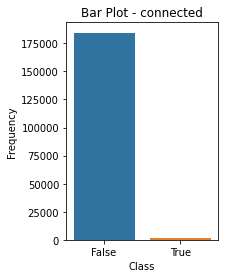

In [9]:
plt.subplot(1, 2, 1)
sns.countplot(data=df, x="connected")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.title("Bar Plot - connected")
plt.show()

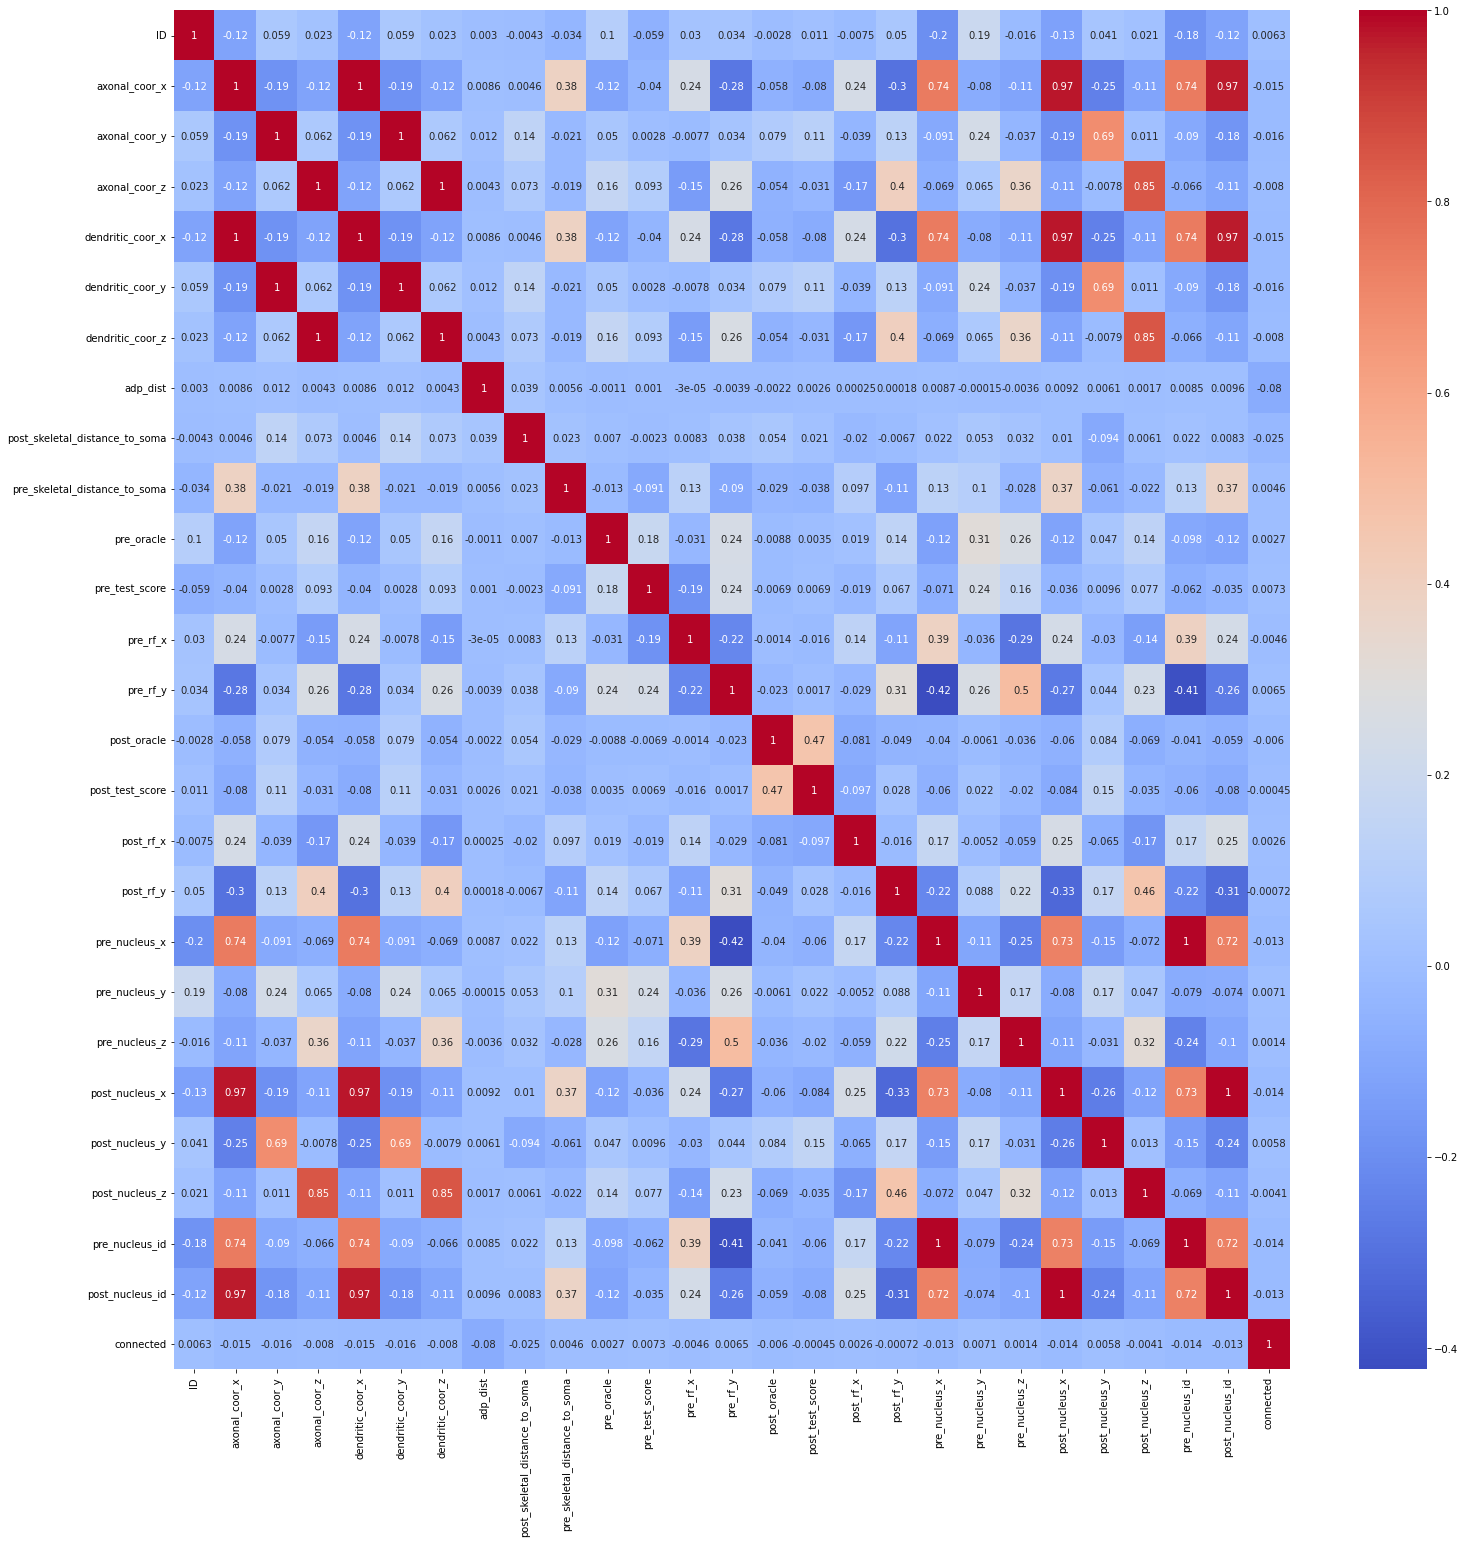

In [10]:
plt.figure(figsize = (25,25))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

In [11]:
print(df['pre_morph_embeddings'][:20][1])

print(df['post_morph_embeddings'][:10][0])

[ 0.37331563  0.20981796 -0.12377156  0.69827348 -0.36436009 -0.08803897
 -0.95162904 -1.84342027 -0.53751272  0.48871696 -0.04196498  0.5997926
 -0.54694623 -0.75036496  0.55511707  0.52048707 -1.53206408  0.92715424
 -0.50563061  0.44323295  0.27195328  0.36682391  0.50746822  0.6308834
 -1.39840472  0.09875204  0.83224845 -0.98368824  1.08574307 -0.39546612
 -1.15127075 -0.4951764 ]
[ 1.0723995  -0.75409424  0.11248356 -0.33294636  0.74433136  1.22747672
 -0.83208716 -0.03111291 -0.36152899  0.55694693 -0.29966968 -0.0296001
  0.89789367 -2.2048285  -0.38498485 -1.06485069 -0.81627333 -0.21522449
 -0.59838223  0.54533499 -0.52522391  0.1716475   1.02296185 -0.04220269
 -0.64514601 -0.687774   -0.12143467 -0.93764007 -0.85765183 -0.41315266
 -0.3406806   0.79048932]


### Pre-processing

In [12]:
#cosine similarity function
def row_feature_similarity(row):
    pre = row["pre_feature_weights"]
    post = row["post_feature_weights"]
    return (pre * post).sum() / (np.linalg.norm(pre) * np.linalg.norm(post))

In [13]:
#simple means to convert from object to float, temp use
def embedding_means(row):
    return np.mean(row['pre_morph_embeddings'])

In [14]:
# get the difference between pre and post nucleus distance
def get_dist(row):
    return np.linalg.norm(np.array([row['pre_nucleus_x'], row['pre_nucleus_y'], row['pre_nucleus_z']]) - 
                         np.array([row['post_nucleus_x'], row['post_nucleus_y'], row['post_nucleus_z']]))

In [15]:
from sklearn.preprocessing import StandardScaler

def feat_engineering(data):
    # Combine our pre and post areas into one projection group feature
    data["projection_group"] = (
        data["pre_brain_area"].astype(str)
        + "->"
        + data["post_brain_area"].astype(str)
    )
    data = data.drop(columns = ['pre_brain_area', 'post_brain_area'])
    
    # label encode our projection groups
    data["projection_group"] = pd.factorize(data["projection_group"])[0]
    
    
    # Get the distance between pre and post nucleus
    data["nucleus_dist"] = data.apply(get_dist, axis=1)
    data = data.drop(columns = ['pre_nucleus_x', 'pre_nucleus_y', 'pre_nucleus_z',
                               'post_nucleus_x', 'post_nucleus_y', 'post_nucleus_z'])
    
    # combine axonal and dendritic coords
    data['axonal_dendritic_x'] = (data['axonal_coor_x'] + data['dendritic_coor_x'])/2
    data['axonal_dendritic_y'] = (data['axonal_coor_y'] + data['dendritic_coor_z'])/2
    data['axonal_dendritic_z'] = (data['axonal_coor_y'] + data['dendritic_coor_z'])/2
    data = data.drop(columns = ['axonal_coor_x', 'axonal_coor_y', 'axonal_coor_z',
                           'dendritic_coor_x', 'dendritic_coor_y', 'dendritic_coor_z'])
    
    # combine feature similarities
    data["fw_similarity"] = data.apply(row_feature_similarity, axis=1)
    data = data.drop(columns=['pre_feature_weights', 'post_feature_weights'])
    
    data['pre_morph_embeddings'] = data.apply(embedding_means, axis=1)
    data['post_morph_embeddings'] = data.apply(embedding_means, axis=1)
    
    # fill nulls with mean
    data['pre_morph_embeddings']  = data['pre_morph_embeddings'].fillna(data['pre_morph_embeddings'].mean())
    data['post_morph_embeddings']  = data['post_morph_embeddings'].fillna(data['post_morph_embeddings'].mean())
    
    # We combine pre and post morph embeddings due to their 1:1 correlation
    data['embeddings'] = (data['pre_morph_embeddings'] + data['post_morph_embeddings'])/2
    data = data.drop(columns=['pre_morph_embeddings', 'post_morph_embeddings'])
    
    # scaling
    scaler = StandardScaler()
    data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
    
    return data

In [16]:
y = df['connected']
X = df.drop(columns = ['ID', 'connected', 'compartment'])
X = feat_engineering(X)

In [17]:
X.dtypes

adp_dist                          float64
post_skeletal_distance_to_soma    float64
pre_skeletal_distance_to_soma     float64
pre_oracle                        float64
pre_test_score                    float64
pre_rf_x                          float64
pre_rf_y                          float64
post_oracle                       float64
post_test_score                   float64
post_rf_x                         float64
post_rf_y                         float64
pre_nucleus_id                    float64
post_nucleus_id                   float64
projection_group                  float64
nucleus_dist                      float64
axonal_dendritic_x                float64
axonal_dendritic_y                float64
axonal_dendritic_z                float64
fw_similarity                     float64
embeddings                        float64
dtype: object

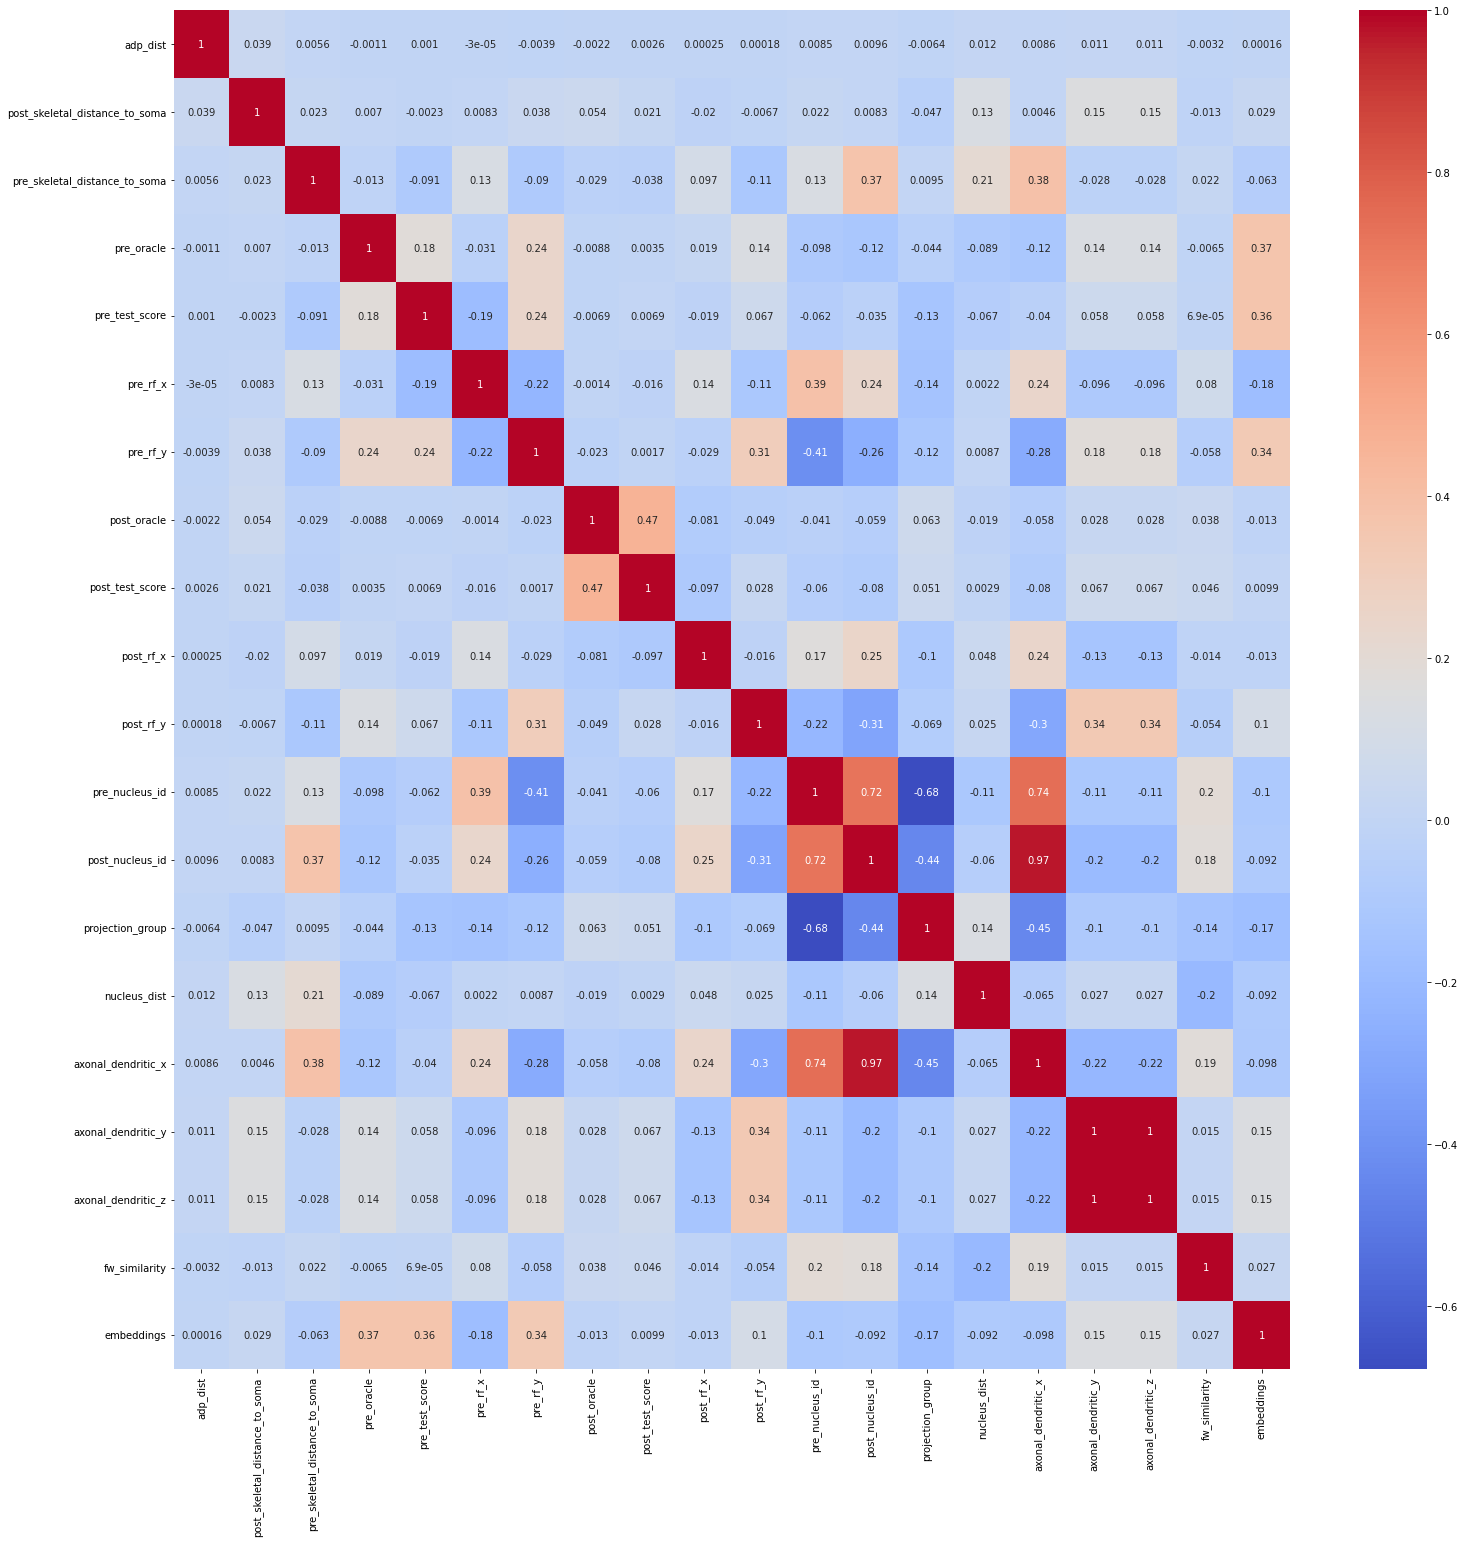

In [18]:
plt.figure(figsize = (25,25))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm")
plt.show()

In [19]:
print(X['fw_similarity'].head(20))

0    -0.182150
1    -0.182150
2    -0.182150
3    -0.182150
4    -0.182150
5     0.299404
6     0.974132
7     0.974132
8     0.974132
9     0.974132
10    0.974132
11    0.974132
12    0.974132
13    0.974132
14    0.974132
15    0.974132
16    0.974132
17   -0.527449
18   -0.527449
19   -0.527449
Name: fw_similarity, dtype: float64


In [20]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

ros = RandomOverSampler(random_state=42)
X, y = ros.fit_resample(
    X, y
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

### Model Fitting

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

loss_scores = list()
best_loss = np.inf

for train_ix, valid_ix in skf.split(X, y):
    X_train, X_valid = X.iloc[train_ix], X.iloc[valid_ix]
    y_train, y_valid = y.iloc[train_ix], y.iloc[valid_ix]
    
    model = LogisticRegression()
    model.fit(X_train, np.ravel(y_train)) 
    yhat = model.predict(X_valid)
    
    loss = log_loss(yhat, y_valid)
    if loss < best_loss:
        best_model = model
        best_loss = loss
        print('best_model_saved')
    loss_scores.append(loss)

loss_scores



best_model_saved
best_model_saved
best_model_saved


[8.486032414197517,
 8.480414507453295,
 8.495041076935005,
 8.337292750426956,
 8.397676776640111]

In [22]:
from sklearn.ensemble import RandomForestClassifier

i = 0
num_feature_splits = (2, 3, 6, 10, int(np.sqrt(len(X.columns))))

loss_scoresRF = list()

for train_ix, valid_ix in skf.split(X, y):
    X_train, X_valid = X.iloc[train_ix], X.iloc[valid_ix]
    y_train, y_valid = y.iloc[train_ix], y.iloc[valid_ix]
    
    modelRF = RandomForestClassifier(max_features = num_feature_splits[i], max_depth = 8, random_state = 42)
    modelRF.fit(X_train, np.ravel(y_train)) 
    yhat = modelRF.predict(X_valid)
    
    loss = log_loss(yhat, y_valid)
    if loss < best_loss:
        best_model = modelRF
        best_loss = loss
        print('best_model_saved')
    loss_scoresRF.append(loss)
    
    i += 1

loss_scoresRF

best_model_saved


[5.068003405817898,
 5.269746952886155,
 5.5015205389682915,
 5.354068576863942,
 5.279644453709734]

In [23]:
from xgboost import XGBClassifier

loss_scoresXGB = list()

i = 0
learning_rates = (.1, .2, .3, .4, .5)

for train_ix, valid_ix in skf.split(X, y):
    X_train, X_valid = X.iloc[train_ix], X.iloc[valid_ix]
    y_train, y_valid = y.iloc[train_ix], y.iloc[valid_ix]
    
    modelXGB = XGBClassifier(max_depth = 2, random_state = 42, eta = learning_rates[i])
    modelXGB.fit(X_train, np.ravel(y_train)) 
    yhat = modelXGB.predict(X_valid)
    
    loss = log_loss(yhat, y_valid)
    if loss < best_loss:
        best_model = modelXGB
        best_loss = loss
        print('best_model_saved')
    loss_scoresXGB.append(loss)
    i += 1

loss_scoresXGB

c:\users\jason nguyen\appdata\local\programs\python\python36\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:18:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\jason nguyen\appdata\local\programs\python\python36\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:18:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\jason nguyen\appdata\local\programs\python\python36\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:18:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\jason nguyen\appdata\local\programs\python\python36\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:18:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\jason nguyen\appdata\local\programs\python\python36\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:18:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[7.51472432959756,
 6.848631328850652,
 6.457396585195154,
 5.923297296544072,
 5.6780136121222995]

<AxesSubplot:>

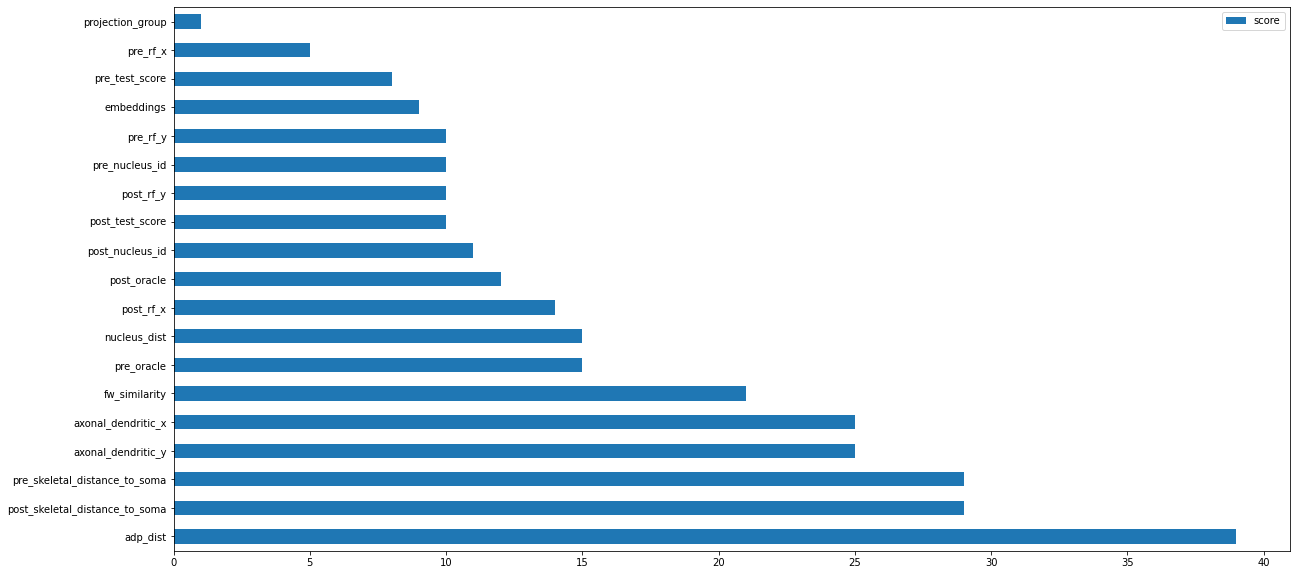

In [24]:
feature_important = modelXGB.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(40, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 40 features

In [25]:
leader = pd.read_csv('leaderboard_data.csv')
leader

,ID,axonal_coor_x,axonal_coor_y,axonal_coor_z,dendritic_coor_x,dendritic_coor_y,dendritic_coor_z,adp_dist,post_skeletal_distance_to_soma,pre_skeletal_distance_to_soma,...,pre_brain_area,post_brain_area,pre_nucleus_x,pre_nucleus_y,pre_nucleus_z,post_nucleus_x,post_nucleus_y,post_nucleus_z,pre_nucleus_id,post_nucleus_id
0,0,527499,544761,912282,529457,543459,916958,4783.37,239163.00,178032.0,...,AL,V1,1368640,451392,861240,566528,777344,920800,582471,199477
1,1,1269890,471870,837816,1271230,469651,841045,4060.72,294573.00,1193910.0,...,AL,RL,1368640,451392,861240,1196352,492736,919560,582471,518848
2,2,666057,469875,925239,665387,467214,923430,2912.80,4102.75,387714.0,...,AL,V1,1368640,451392,861240,669760,470336,913720,582471,256716
3,3,696633,453516,925806,696648,453417,921875,3272.83,31123.00,424714.0,...,AL,V1,1368640,451392,861240,669760,470336,913720,582471,256716
4,4,567525,585921,888426,570714,583676,891264,4441.75,114201.00,250411.0,...,AL,V1,1368640,451392,861240,672384,609728,932720,582471,260802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42588,42588,765513,818622,870114,766346,817181,871011,1597.63,74187.70,426027.0,...,V1,V1,741376,572288,837120,807168,757376,869080,294484,335443
42589,42589,784476,609000,828177,782564,606911,828562,2607.11,172794.00,553175.0,...,V1,V1,741376,572288,837120,807168,757376,869080,294484,335443
42590,42590,766038,773808,861693,763428,773490,862976,2648.36,44174.50,372663.0,...,V1,V1,741376,572288,837120,807168,757376,869080,294484,335443
42591,42591,738276,614460,855099,741617,612387,854028,3843.24,178179.00,517147.0,...,V1,V1,741376,572288,837120,807168,757376,869080,294484,335443


In [26]:
leader = (
    leader.merge(
        feature_weights.rename(columns=lambda x: "pre_" + x), 
        how="left", 
        validate="m:1",
        copy=False,
    )
    .merge(
        feature_weights.rename(columns=lambda x: "post_" + x),
        how="left",
        validate="m:1",
        copy=False,
    )
    .merge(
        morph_embeddings.rename(columns=lambda x: "pre_" + x),
        how="left",
        validate="m:1",
        copy=False,
    )
    .merge(
        morph_embeddings.rename(columns=lambda x: "post_" + x),
        how="left",
        validate="m:1",
        copy=False,
    )
)

In [27]:
ids = leader['ID']
X_test = leader.drop(columns=['ID', 'compartment'])
X_test = feat_engineering(X_test)

submit_preds = best_model.predict(X_test)

In [28]:
submit = pd.DataFrame(submit_preds, columns = ['connected'])
submit = submit['connected'].replace({0:False, 1:True})
submit = pd.DataFrame(submit, columns = ['connected'])
submit['ID'] = ids
submit = submit[['ID','connected']]


submit.head()

,ID,connected
0,0,False
1,1,False
2,2,False
3,3,False
4,4,False


In [29]:
submit.to_csv('submission.csv', index=False)


In [30]:
submit.connected.value_counts()

False    32334
True     10259
Name: connected, dtype: int64